In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [2]:

def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3', 'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'IK')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.mot'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(10), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.mot', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        #print(joint_data_filtered)
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
joint_data_within_intervals = extract_data_within_intervals(base_path, 'anterior_1')
joint_data_high = extract_data_within_intervals(base_path, 'anterior_3')

In [3]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [4]:
average_joint = stack_joint_data(joint_data_within_intervals)
average_joint_high = stack_joint_data(joint_data_high)

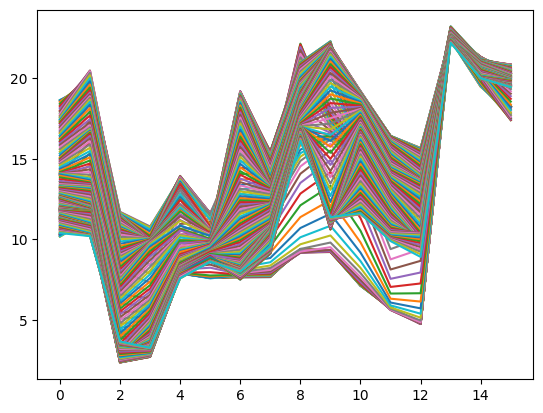

In [5]:
hip_flexion_l_new = average_joint['hip_flexion_l']
hip_flexion_r_new = average_joint['hip_flexion_r']
ankle_angle_l_new = average_joint['ankle_angle_l']
ankle_angle_r_new = average_joint['ankle_angle_r']

hip_flexion_l_new_high = average_joint_high['hip_flexion_l']
hip_flexion_r_new_high = average_joint_high['hip_flexion_r']

ankle_angle_l_new_high = average_joint_high['ankle_angle_l']
ankle_angle_r_new_high = average_joint_high['ankle_angle_r']

knee_angle_l_new = -average_joint['knee_angle_l']
knee_angle_r_new = -average_joint['knee_angle_r']

plt.plot(knee_angle_l_new)
plt.show()

In [6]:
def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3',  'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'ID')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.sto'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(6), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.sto', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
torque_data_within_intervals = extract_data_within_intervals(base_path, 'anterior_1')
torque_data_high = extract_data_within_intervals(base_path, 'anterior_3')

In [7]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [8]:
average_torque = stack_joint_data(torque_data_within_intervals)
average_torque_high = stack_joint_data(torque_data_high)

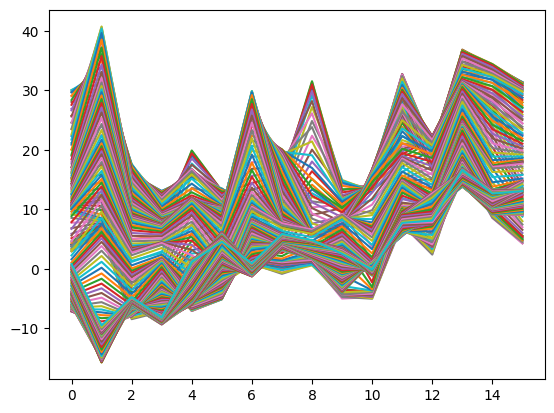

In [9]:
hip_flexion_l_m_new = average_torque['hip_flexion_l_moment']
hip_flexion_r_m_new = average_torque['hip_flexion_r_moment']
ankle_angle_l_m_new = average_torque['ankle_angle_l_moment']
ankle_angle_r_m_new = average_torque['ankle_angle_r_moment']

hip_flexion_l_m_high = average_torque_high['hip_flexion_l_moment']
hip_flexion_r_m_high = average_torque_high['hip_flexion_r_moment']
ankle_angle_l_m_high = average_torque_high['ankle_angle_l_moment']
ankle_angle_r_m_high = average_torque_high['ankle_angle_r_moment']

knee_angle_l_m_new = average_torque['knee_angle_l_moment']
knee_angle_r_m_new = average_torque['knee_angle_r_moment']

plt.plot(knee_angle_r_m_new)
plt.show()

In [10]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_02_06_15_05_110SAC'#'2025_01_22_22_53_000SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]
bins_high = [20, 22, 24, 26, 28, 30]

In [11]:
AP_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
print(len(stand))
mass = 150

100


In [ ]:
for data in stand:
    AP_pert.append(data)
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    print(acc)
    if bins[0] <= acc <= bins[1]:
        pert_1_AP.append(data)
    elif bins[1] <= acc <= bins[2]:
        pert_2_AP.append(data)
    elif bins[2] <= acc <= bins[3]:
        pert_3_AP.append(data)
    elif bins[3] <= acc <= bins[4]:
        pert_4_AP.append(data)
    elif bins[4] <= acc <= bins[5]:
        pert_5_AP.append(data)     
    elif bins_high[0] <= acc <= bins_high[1]:
        pert_1_AP_high.append(data)
    elif bins_high[1] <= acc <= bins_high[2]:
        pert_2_AP_high.append(data)
    elif bins_high[2] <= acc <= bins_high[3]:
        pert_3_AP_high.append(data)
    elif bins_high[3] <= acc <= bins_high[4]:
        pert_4_AP_high.append(data)
    elif bins_high[4] <= acc <= bins_high[5]:
        pert_5_AP_high.append(data)       

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]
pert_AP_high = [pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high]
print(len(pert_5_AP))


joint_names_l = ['ankle_angle_l',  'hip_flexion_l'] #'hip_adduction_l', 'hip_rotation_l',
title = ['Ankle',  'Hip Flexion'] #'Hip Adduction', 'Hip Rotation', 
joint_names_r = ['ankle_angle_r', 'hip_flexion_r'] #'hip_adduction_r','hip_rotation_r',

5.513593018279442
8.289338355431768
20.491066919433965
3.5824686197034628
3.3057382925624412
9.50344739004376
24.586764135587067
3.4379860371811106
27.208271276113067
19.35169770006894
4.759035684369449
17.245513477274766
5.698318894006634
28.265902797796908
18.30831456746358
13.04396850338133
11.205281696559831
23.7851814469065
22.50450838367654
1.2819353773010802
24.438843175897706
6.234527160890296
6.746643678196328
6.05200430077532
30.223428382526365
3.725008474262369
15.769921723154111
12.105211579014675
1.9598509481875255
13.940775064175059
7.217670788048566
1.9810160491232882
16.041024561555492
26.29487661787481
13.709388347068682
4.250308906979842
9.405011992420944
25.16146756842953
7.883247085773395
16.528100382725473
9.40556266836525
5.826546068228945
6.051190282506886
21.772865441012414
14.374683933845574
25.516221436835554
6.528540745007941
11.00670124016854
15.191512872187618
3.8295675167171574
9.95748603759118
12.50207911256355
7.527299899272964
17.852434719604474
19.7440

In [13]:
joint_names_l_high = ['ankle_angle_l', 'hip_flexion_l']
title_high = ['Ankle_high', 'Hip Flexion']
joint_names_r_high = ['ankle_angle_r', 'hip_flexion_r']

In [14]:
time_mo  = np.linspace(0, 2, 200)

200
ankle_exp mean

 5.4314592865625 1.4098332182060993
ankle_exp mean 5.4314592865625 1.4098332182060993
ankle_exp mean 5.4314592865625 1.4098332182060993
ankle_exp mean 5.4314592865625 1.4098332182060993
ankle_exp mean 5.4314592865625 1.4098332182060993
sim 2.208358607745046 0.7770799354768582
hip_flex_exp mean 4.1010910743750015 3.7642055754071198
hip_flex_exp mean 4.1010910743750015 3.7642055754071198
hip_flex_exp mean 4.1010910743750015 3.7642055754071198
hip_flex_exp mean 4.1010910743750015 3.7642055754071198
hip_flex_exp mean 4.1010910743750015 3.7642055754071198
sim 1.0411045428884598 0.25516295044252724
ankle_flex_exp mean 31.673580966875 5.5448799873647
ankle_flex_exp mean 31.673580966875 5.5448799873647
ankle_flex_exp mean 31.673580966875 5.5448799873647
ankle_flex_exp mean 31.673580966875 5.5448799873647
ankle_flex_exp mean 31.673580966875 5.5448799873647
sim 20.481487627104368 5.104342741207501
[22.166835346580662, 16.603071943803794, 20.439558724956903, 14.186506534914955, 29.011465585265526

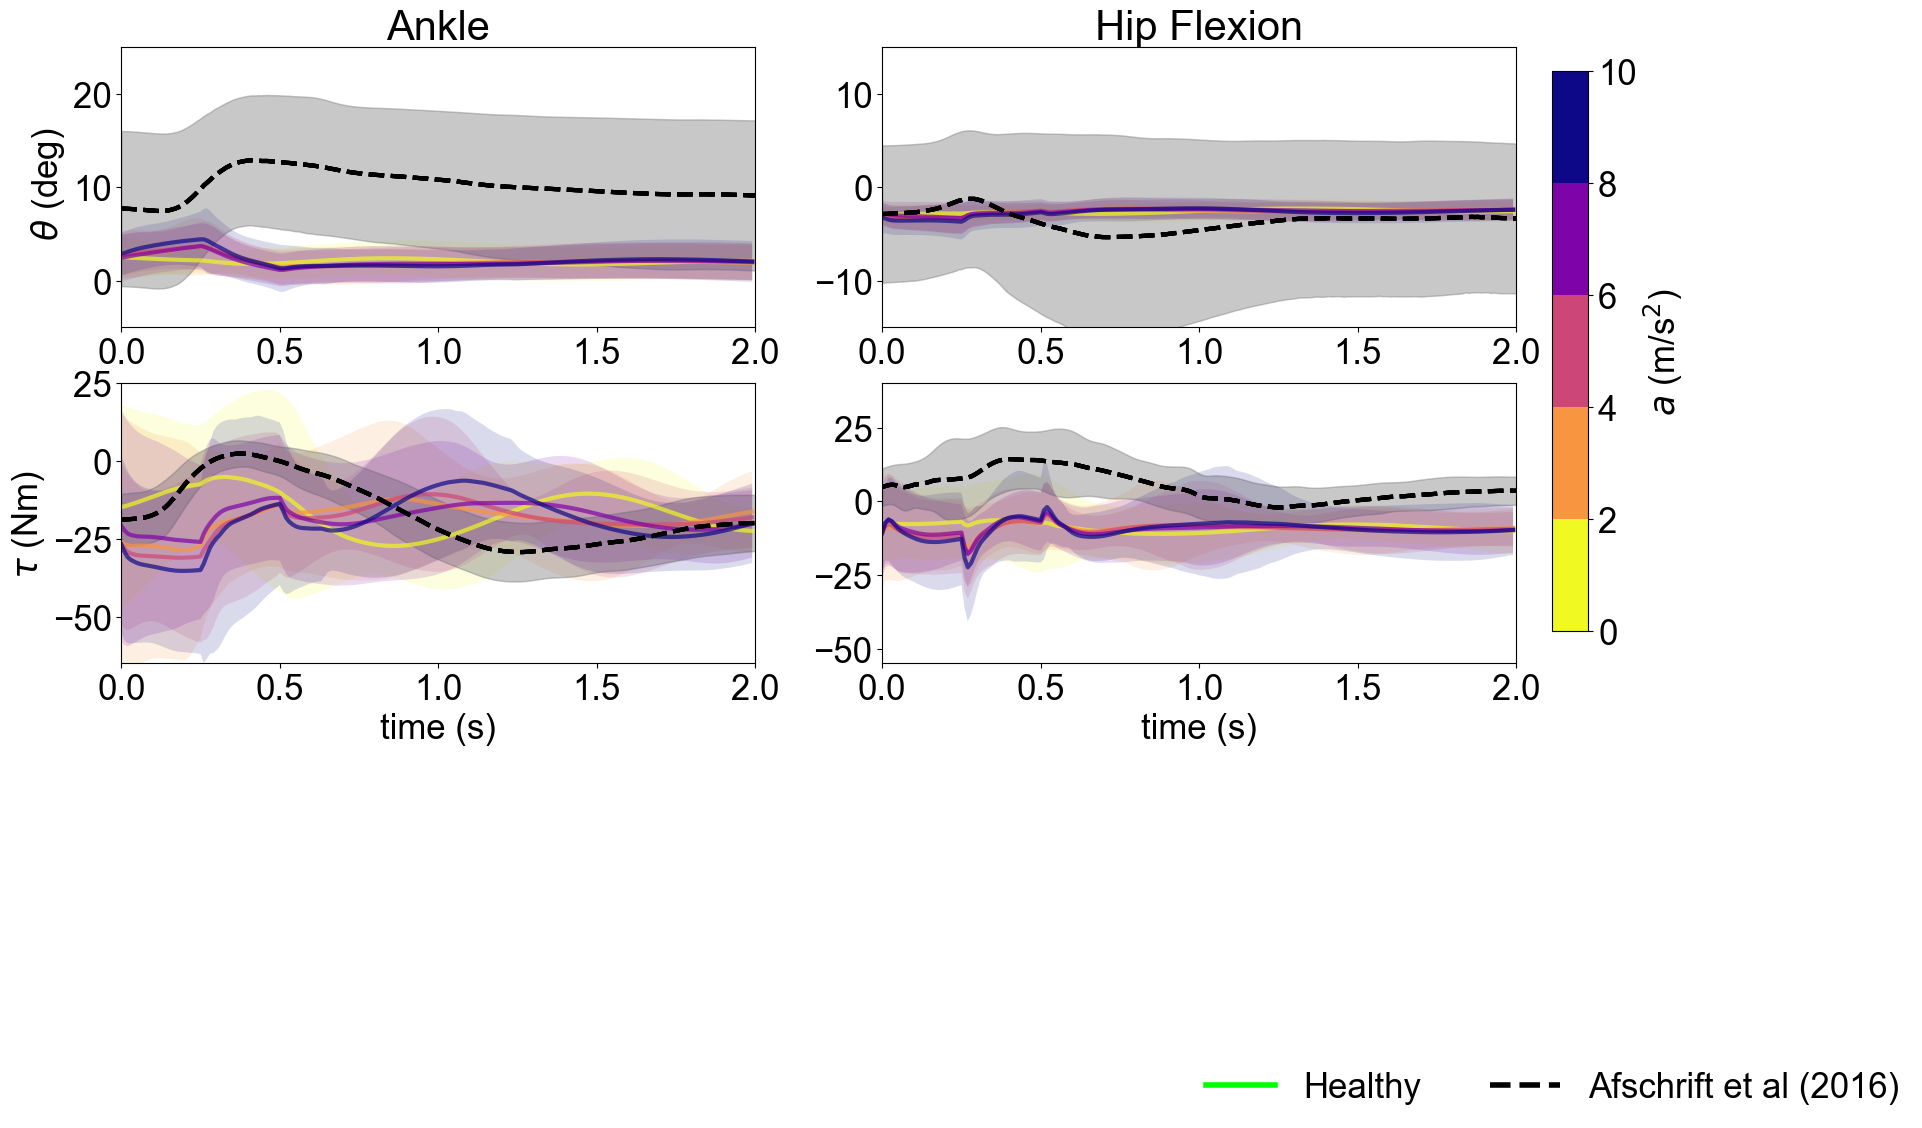

In [15]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))

mean_sim = []
std_sim = []


colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins, colormap.N)
fig, ax = plt.subplots(2, 2, figsize=(18, 8))

for i in range(0, 2):
    plt.subplot(2, 2, i+1)
    mean_sim = []
    std_sim = []
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            mean_sim.append(np.max(mean) - np.min(mean))
            std_sim.append(np.max(std) - np.min(std))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flexion_new = np.concatenate((hip_flexion_l_new, hip_flexion_r_new), axis = 0)
                mean_e = np.mean(hip_flexion_new, axis = 0)
                std_e = np.std(hip_flexion_new, axis = 0)
                print('hip_flex_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                # Assuming ankle_angle_l_new and ankle_angle_r_new are both 2D arrays with the same number of columns
                ankle_angle_new = np.concatenate((ankle_angle_l_new, ankle_angle_r_new), axis=0)
                mean_e = np.mean(ankle_angle_new, axis = 0)
                std_e = np.std(ankle_angle_new, axis = 0)
                print('ankle_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    plt.title(title[i])
    print('sim', np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r' $\theta$ (deg)')

mean_sim = []
std_sim = []

for i in range(0, 2):
    plt.subplot(2, 2, i+3)
    mean_sim = []
    std_sim = []
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            mean_sim.append(np.max(mean) - np.min(mean))
            std_sim.append(np.max(std) - np.min(std))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flexion_m_new = np.concatenate((hip_flexion_l_m_new, hip_flexion_r_m_new), axis = 0)
                mean_e = np.mean(hip_flexion_m_new, axis = 0)
                std_e = np.std(hip_flexion_m_new, axis = 0)
                print('hip_flex_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_m_new = np.concatenate((ankle_angle_l_m_new, ankle_angle_r_m_new), axis = 0)
                mean_e = np.mean(ankle_angle_m_new, axis = 0)
                std_e = np.std(ankle_angle_m_new, axis = 0)
                print('ankle_flex_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    print('sim', np.mean(mean_sim), np.std(mean_sim))
    print(mean_sim)
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')


sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 10, 6), cax=cbar_ax) 
cbar.set_label(r'$a$ (m/s$^2$)')

ax[0, 0].set_ylim(-5, 25)
ax[1, 0].set_ylim(-65, 25)
ax[0, 1].set_ylim(-15, 15)
ax[1, 1].set_ylim(-55, 40)

#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
#fig.suptitle('Ankle Strategy', fontsize=40) 
plt.setp(ax, xlim=[0, time_len/100])
plt.legend(labels=['Healthy', 'Afschrift et al (2016)'], 
           loc='lower center', bbox_to_anchor=(0.0, -0.9), ncol=4, frameon = False,
           handles=[
               plt.Line2D([0], [0], color='lime', lw=4),
               plt.Line2D([0], [0], linestyle='--', color='black', lw=4)
           ])
plt.show()
plt.close()

200
ankle_exp mean 5.895547973181818 1.3802731436035627
ankle_exp mean 5.895547973181818 1.3802731436035627
ankle_exp mean 5.895547973181818 1.3802731436035627
ankle_exp mean 5.895547973181818 1.3802731436035627
ankle_exp mean 5.895547973181818 1.3802731436035627
sim 6.337294920536168 1.1153476669561428
hip_flex_exp mean 2.6239689654545457 4.6647805169249565
hip_flex_exp mean 2.6239689654545457 4.6647805169249565
hip_flex_exp mean 2.6239689654545457 4.6647805169249565
hip_flex_exp mean 2.6239689654545457 4.6647805169249565
hip_flex_exp mean 2.6239689654545457 4.6647805169249565
sim 1.9894256566598565 0.4112825939561913
ankle_exp mean 30.425760471363635 17.707340959410725
ankle_exp mean 30.425760471363635 17.707340959410725
ankle_exp mean 30.425760471363635 17.707340959410725
ankle_exp mean 30.425760471363635 17.707340959410725
ankle_exp mean 30.425760471363635 17.707340959410725
sim 40.24526225001634 6.03300907652954
hip_flex_exp mean 15.262771048636367 13.446429085873856
hip_flex_exp 

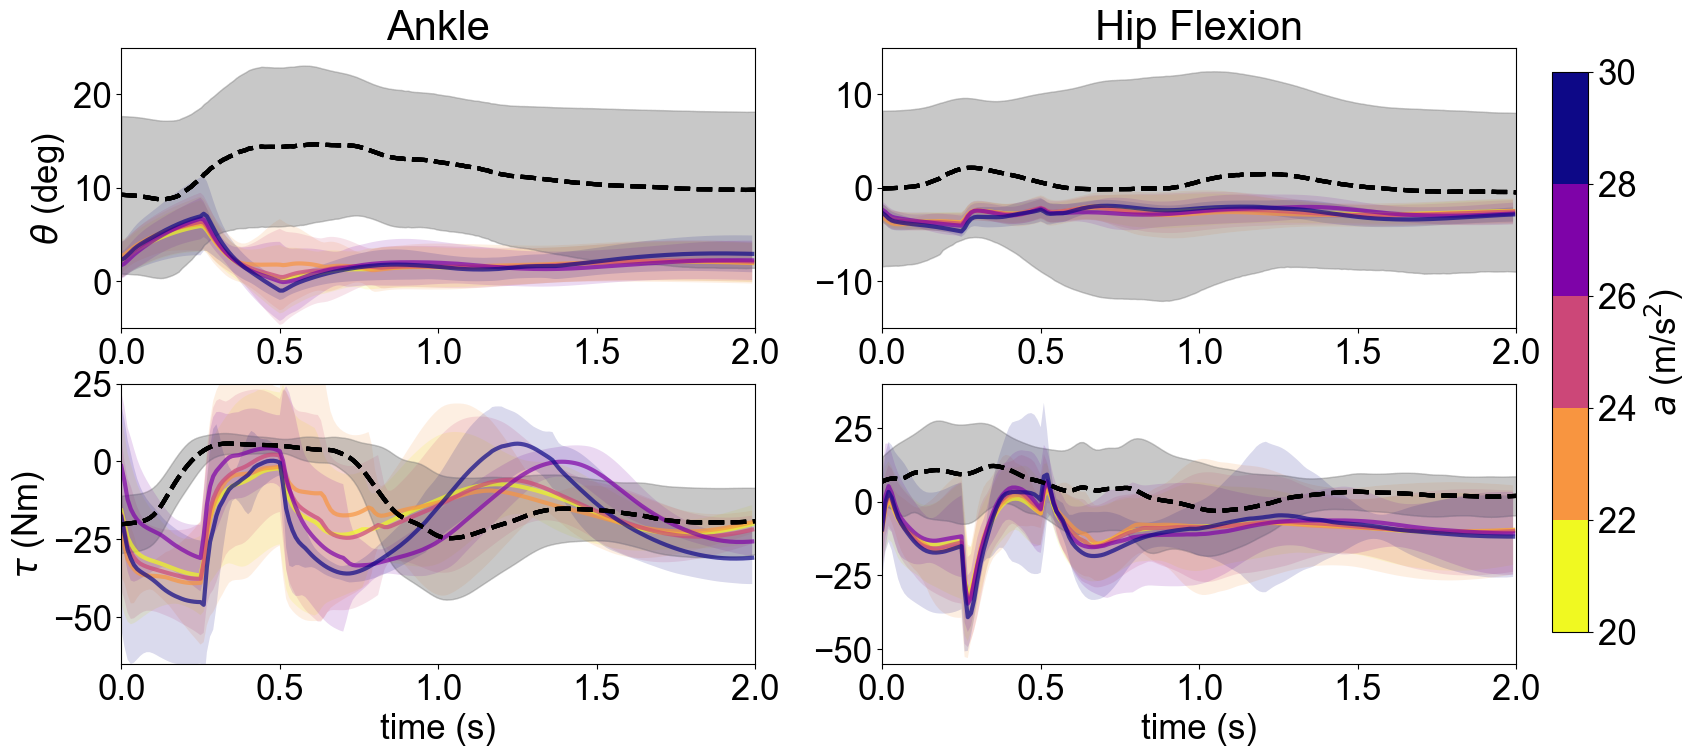

In [ ]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))

mean_sim = []
std_sim = []

colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins_high, colormap.N)
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
for i in range(0, 2):
    mean_sim = []
    std_sim = []
    plt.subplot(2, 2, i+1)
    for j in range(len(pert_AP_high)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            mean_sim.append(np.max(mean) - np.min(mean))
            std_sim.append(np.mean(std))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flex_high = np.concatenate((hip_flexion_l_new_high, hip_flexion_r_new_high), axis= 0)
                mean_e = np.mean(hip_flex_high, axis = 0)
                std_e = np.std(hip_flex_high, axis = 0)
                print('hip_flex_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_high = np.concatenate((ankle_angle_l_new_high, ankle_angle_r_new_high), axis= 0)
                mean_e = np.mean(ankle_angle_high, axis = 0)
                std_e = np.std(ankle_angle_high, axis = 0)
                print('ankle_exp mean', np.max( mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            #correlation_matrix = np.corrcoef(np.mean(ankle_angle_high, axis = 0), np.mean(l[j], axis= 0).flatten()*180/np.pi)
            #print(spearmanr(np.mean(ankle_angle_high, axis = 0), np.mean(l[j], axis= 0).flatten()*180/np.pi)[0])
            #print(correlation_matrix[0, 1])
    plt.title(title[i])
    print('sim', np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r'$\theta$ (deg)')

mean_sim = []
std_sim = []

for i in range(0, 2):
    plt.subplot(2, 2, i+3)
    mean_sim = []
    std_sim = []
    for j in range(len(pert_AP_high)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            mean_sim.append(np.max(mean) - np.min(mean))
            std_sim.append(np.mean(std))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flex_m_high = np.concatenate((hip_flexion_l_m_high, hip_flexion_r_m_high), axis= 0)
                mean_e = np.mean(hip_flex_m_high, axis = 0)
                std_e = np.std(hip_flex_m_high, axis = 0)
                print('hip_flex_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_m_high = np.concatenate((ankle_angle_l_m_high, ankle_angle_r_m_high), axis= 0)
                mean_e = np.mean(ankle_angle_m_high, axis = 0)
                std_e = np.std(ankle_angle_m_high, axis = 0)
                print('ankle_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    print('sim', np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')


sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(20, 30, 6), cax=cbar_ax) 
cbar.set_label(r'$a$ (m/s$^2$)')

ax[0, 0].set_ylim(-5, 25)
ax[1, 0].set_ylim(-65, 25)
ax[0, 1].set_ylim(-15, 15)
ax[1, 1].set_ylim(-55, 40)


#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
plt.setp(ax, xlim=[0, time_len/100])
#fig.suptitle('Hip Strategy', fontsize=40) 
plt.show()
plt.close()